# Motion Silencing Illusion
##### By: Kevin Ko for Psych 30

This illusion is called 'motion silencing', and was discovered by the vision lab at Harvard University (http://visionlab.harvard.edu/silencing/). 

> SILENCING demonstrates the tight coupling of motion and object appearance. Simply by changing the retinotopic coordinates—moving the object or the eyes—it is possible to silence awareness of visual change, causing objects that had once been obviously dynamic to suddenly appear static.

In [2]:
%matplotlib inline
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import animation, rc
from IPython.display import HTML

### Constants

In [3]:
FRAME_INTERVAL = 8     # how long to wait per frame
COLOR_INTERVAL = 5     # change color after every 20 frames
NUM_FRAMES = 4 * 360   # should be multiple of 360
NUM_CIRCLES = 60       # should be multiple of NUM_LAYERS
NUM_LAYERS = 3
CIRCLE_RADIUS = 0.3
AX_X_LIM = 15
AX_Y_LIM = 15

### Calculate circle's position and generate color map

In [4]:
def get_point(center, radius, angle):
    x = center + radius * np.sin(np.radians(angle))
    y = center + radius * np.cos(np.radians(angle))
    return (x,y)

def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)

cmap = get_cmap(NUM_CIRCLES)

### Classes to track circle patches and their trajectories

In [5]:
class Trajectory:
    def __init__(self, center, radius, angle):
        self.center = center
        self.radius = radius
        self.angle = angle
        
    def increment(self):
        self.angle += 1
        if self.angle >= 360:
            self.angle -= 360
    
    def decrement(self):
        self.angle -= 1
        if self.angle <= 0:
            self.angle += 360
        
    def point(self):
        return get_point(self.center, self.radius, self.angle)
        
class Circle:        
    def __init__(self, radius, trajectory, color):
        self.color = color
        self.patch = plt.Circle(trajectory.point(), radius, fc=cmap(color), ec='black', alpha=1.0)
        self.patch.center = trajectory.point()
        self.trajectory = trajectory
    
    def increment(self, color=False, move=True, reverse=False):
        if move:
            if reverse: self.trajectory.decrement()
            else: self.trajectory.increment()
        if color:
            self.color += 1
            if self.color >= NUM_CIRCLES:
                self.color -= NUM_CIRCLES
    
    def update(self):
        self.patch.center = self.trajectory.point()
        self.patch.set_fc(cmap(self.color))

### Generate circles on random trajectories

In [6]:
circles = []
colors = random.sample(range(0, NUM_CIRCLES), NUM_CIRCLES) # random colors

for i in range(NUM_CIRCLES):
    center = AX_X_LIM / 2
    angle = (360 / (NUM_CIRCLES / NUM_LAYERS)) * i
    radius = 3 + (i // (NUM_CIRCLES / NUM_LAYERS)) * (2.5*CIRCLE_RADIUS)
    
    trajectory = Trajectory(AX_X_LIM / 2, radius, angle)
    circle = Circle(CIRCLE_RADIUS, trajectory, colors[i])
    circles.append(circle)

### Draw the plot and animate transformation

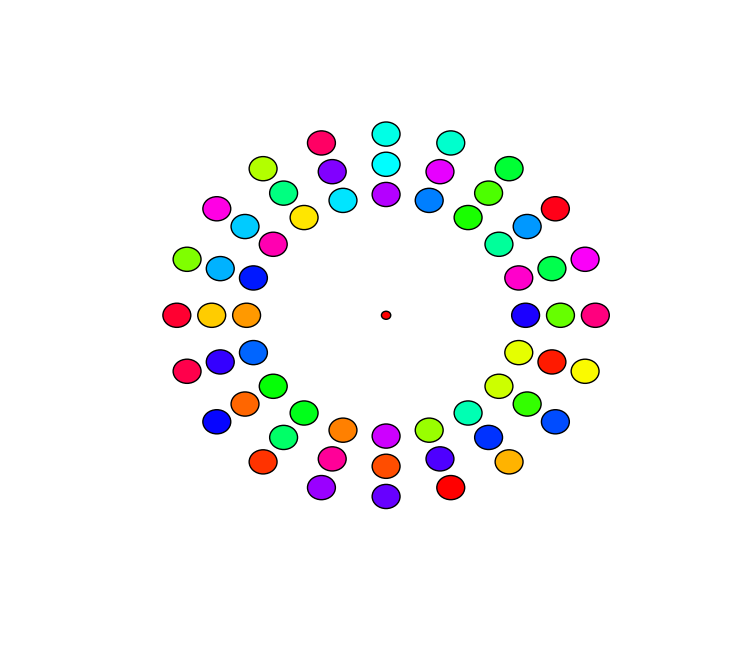

In [7]:
fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(9, 8)

ax = plt.axes(xlim=(0, AX_X_LIM), ylim=(0, AX_Y_LIM))
ax.set_axis_off()

# draw a focus point for observer
reddot = plt.Circle((AX_X_LIM/2, AX_X_LIM/2), 0.1, ec='black', fc='red')
ax.add_patch(reddot)

def init():
    patches = [reddot]
    for circle in circles:
        patches.append(circle.patch)
        ax.add_patch(circle.patch)
    return tuple(patches)

def animate(i):
    patches = [reddot]
    progress = i / NUM_FRAMES
    
    doColor = i % COLOR_INTERVAL == 0
    doMove = progress >= .4 and progress <= .7
    doReverse = progress >= .5 and progress <= .6
    
    for circle in circles:
        circle.increment(color=doColor, move=doMove, reverse=doReverse)
        circle.update()
        patches.append(circle.patch)
    return tuple(patches)

anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=NUM_FRAMES, 
                               interval=FRAME_INTERVAL,
                               blit=True)

Now to represent this animation in Jupyter, we'll convert it using ffmpeg via HTML5 so that the animation displays as a video. This may take awhile depending on your Jupyter setup.

In [9]:
anim.save('silencing.mp4', fps=60, extra_args=['-vcodec', 'libx264'])
HTML(anim.to_html5_video())
rc('animation', html='html5')
anim

## Observer Directions
Focus on the red dot in the center. Notice how the colors are changing when the circles are not rotating, but as soon as they rotate the colors don't seem to change!